In [1]:
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False
if IN_COLAB:
    print("Baixando Funções que serão usadas nesse notebook")
    ! shred -u astroFunctions.py
    ! wget https://raw.githubusercontent.com/rafaelmgr12/PHOTOzxcorr/main/functions/ml_functions.py -O ml_functions.py
    ! wget
    ! pip install esutil
    ! pip install healpy
    import astroFunctions as astro
    from google.colab import drive
    drive.mount('/content/drive')
else:
    import sys,os
    home = os.getenv("HOME")
    sys.path.append(home+"/Projetos/PHOTOzxcorr/functions/") # user here the path where we download the folder DESzxcoorr
    
    

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from tqdm import tqdm_notebook as tqdm


import tensorflow as tf
import tensorflow_probability as tfp
from sklearn.decomposition import PCA

from astropy.table import Table
from sklearn.metrics import mean_squared_error,mean_absolute_error
import ml_algorithims as ml
import matplotlib.pyplot as plt
import random
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from scipy.constants import pi
from scipy import stats
import keras as ks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization,Activation
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.constraints import max_norm
from tensorflow.keras import layers
from tensorflow.keras import regularizers
tfd = tfp.distributions
tfpl = tfp.layers

%matplotlib inline

In [3]:
def rmse(y_true, y_pred):
    return ks.backend.sqrt(ks.backend.mean(ks.backend.square(y_pred - y_true), axis=-1))

In [4]:
vipers = Table.read("../data/vipers.fits").to_pandas()
vipers.sample(5)

,ID,RA_1,DEC_1,z,z_Err,flag,source,comments,totobs,totexp,...,SPREADERR_MODEL_R,SPREADERR_MODEL_I,SPREADERR_MODEL_Z,SPREADERR_MODEL_Y,WAVG_SPREADERR_MODEL_G,WAVG_SPREADERR_MODEL_R,WAVG_SPREADERR_MODEL_I,WAVG_SPREADERR_MODEL_Z,WAVG_SPREADERR_MODEL_Y,random
36067,b'VIPERS 121099161',32.800190,-4.243589,0.6479,-9.999,b' 2.5',b'VIPERS',b'-',-9,-9,...,0.003202,0.003749,0.007091,0.012648,-99.000000,0.003664,0.003859,-99.000000,-99.000000,0.602392
36849,b'VIPERS 115153757',35.746708,-4.883301,0.8026,-9.999,b' 4.5',b'VIPERS',b'-',-9,-9,...,0.002753,0.003023,0.004811,0.018192,0.003089,0.002834,0.003012,0.005936,-99.000000,0.346176
12617,b'VIPERS 103138452',32.676444,-5.961291,0.5356,-9.999,b' 3.4',b'VIPERS',b'-',-9,-9,...,0.001972,0.001249,0.002000,0.004992,-99.000000,0.001991,0.001365,0.002181,0.007116,0.122143
42250,b'VIPERS 113172790',33.644348,-4.836596,0.9580,-9.999,b' 4.4',b'VIPERS',b'-',-9,-9,...,0.001601,0.001353,0.002265,0.012514,0.001812,0.001560,0.001416,0.001990,-99.000000,0.184836
631,b'VIPERS 108147325',37.653583,-5.802245,0.7192,-9.999,b' 3.4',b'VIPERS',b'-',-9,-9,...,0.002548,0.001382,0.001491,0.006973,-99.000000,0.002681,0.001549,0.001799,-99.000000,0.012033


In [5]:
feat = ['MAG_AUTO_G','MAG_AUTO_R','MAG_AUTO_I','MAG_AUTO_Z','MAG_AUTO_Y',
        'MAG_AUTO_G_DERED','MAG_AUTO_R_DERED','MAG_AUTO_I_DERED','MAG_AUTO_Z_DERED','MAG_AUTO_Y_DERED',
        "WAVG_MAG_PSF_G","WAVG_MAG_PSF_R","WAVG_MAG_PSF_I","WAVG_MAG_PSF_Z","WAVG_MAG_PSF_Y"
       ,'WAVG_MAG_PSF_G_DERED','WAVG_MAG_PSF_R_DERED','WAVG_MAG_PSF_I_DERED','WAVG_MAG_PSF_Z_DERED','WAVG_MAG_PSF_Y_DERED']


In [6]:
vipers.loc[vipers[feat[0]]==99,feat[0]] = vipers[vipers[feat[0]]!=99][feat[0]].max()
vipers.loc[vipers[feat[1]]==99,feat[1]] = vipers[vipers[feat[1]]!=99][feat[1]].max()
vipers.loc[vipers[feat[2]]==99,feat[2]] = vipers[vipers[feat[2]]!=99][feat[2]].max()
vipers.loc[vipers[feat[3]]==99,feat[3]] = vipers[vipers[feat[3]]!=99][feat[3]].max()
vipers.loc[vipers[feat[4]]==99,feat[4]] = vipers[vipers[feat[4]]!=99][feat[4]].max()
vipers.loc[vipers[feat[5]]>90,feat[5]] = vipers[vipers[feat[5]]<90][feat[5]].max()
vipers.loc[vipers[feat[6]]>90,feat[6]] = vipers[vipers[feat[6]]<90][feat[6]].max()
vipers.loc[vipers[feat[7]]>90,feat[7]] = vipers[vipers[feat[7]]<90][feat[7]].max()
vipers.loc[vipers[feat[8]]>90,feat[8]] = vipers[vipers[feat[8]]<90][feat[8]].max()
vipers.loc[vipers[feat[9]]>90,feat[9]] = vipers[vipers[feat[9]]<90][feat[9]].max()
vipers.loc[vipers[feat[10]]>90,feat[10]] = vipers[vipers[feat[10]]<90][feat[10]].max()
vipers.loc[vipers[feat[11]]>90,feat[11]] = vipers[vipers[feat[11]]<90][feat[11]].max()
vipers.loc[vipers[feat[12]]>90,feat[12]] = vipers[vipers[feat[12]]<90][feat[12]].max()
vipers.loc[vipers[feat[13]]>90,feat[13]] = vipers[vipers[feat[13]]<90][feat[13]].max()
vipers.loc[vipers[feat[14]]>90,feat[14]] = vipers[vipers[feat[14]]<90][feat[14]].max()
vipers.loc[vipers[feat[15]]>90,feat[15]] = vipers[vipers[feat[15]]<90][feat[15]].max()
vipers.loc[vipers[feat[16]]>90,feat[16]] = vipers[vipers[feat[16]]<90][feat[16]].max()
vipers.loc[vipers[feat[17]]>90,feat[17]] = vipers[vipers[feat[17]]<90][feat[17]].max()
vipers.loc[vipers[feat[18]]>90,feat[18]] = vipers[vipers[feat[18]]<90][feat[18]].max()
vipers.loc[vipers[feat[19]]>90,feat[19]] = vipers[vipers[feat[19]]<90][feat[19]].max()

In [7]:
X, y = ml.get_features_targets_des2(vipers)

#X_res, y_res = ml.smote(X,y,20000,3)



X_train, X_test, y_train, y_test = ml.tts_split(X, y, 0.3, 5)



Text(0, 0.5, 'Frequency')

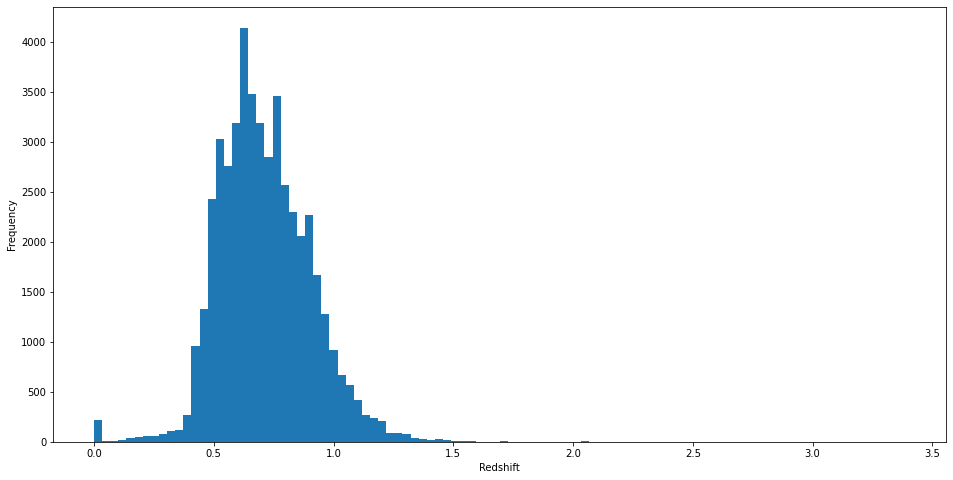

In [8]:
plt.figure(figsize=(16,8))
plt.hist(y,bins = 100)
plt.xlabel("Redshift")
plt.ylabel("Frequency")

In [9]:
BATCH_SIZE = 64
STEPS_PER_EPOCH = len(X_train)//BATCH_SIZE
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
  0.001,
  decay_steps=STEPS_PER_EPOCH*1000,
  decay_rate=1,
  staircase=False)

In [10]:
# define the loss function as negative log likellyhood


def nll(y_true,y_pred):
    return -y_pred.log_prob(y_true)

def prior(kernel_size,bias_size,dtype = None):
    n = kernel_size+bias_size #number of weigths
    prior_model = Sequential([
        tfpl.DistributionLambda(
            lambda t: tfd.MultivariateNormalDiag(loc = tf.zeros(n),scale_diag = tf.ones(n))
        )
    ])
    return prior_model

def posterior (kernel_size,bias_size,dtype = None):
    n = kernel_size + bias_size
    posterior_model = Sequential([
        tfpl.VariableLayer(tfpl.MultivariateNormalTriL.params_size(n),dtype = dtype),
        tfpl.MultivariateNormalTriL(n)
            
    ])
    return posterior_model

kernel_divergence_fn=lambda q, p, _: tfp.distributions.kl_divergence(q, p) / (X_train.shape[0] * 1.0)
bias_divergence_fn=lambda q, p, _: tfp.distributions.kl_divergence(q, p) / (X_train.shape[0] * 1.0)

In [11]:
EarlyStop = EarlyStopping(monitor='rmse', mode='min', patience=10)
n_inputs = X_train.shape[1]
divergence_fn = lambda q, p, _ : tfd.kl_divergence(q,p) / X_train.shape[0]

# Build model.
model = Sequential([Dense(n_inputs,input_shape = X_train.shape[1:],kernel_initializer='normal', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
                              bias_regularizer=regularizers.l2(1e-4),activity_regularizer=regularizers.l2(1e-5)),
                    
                     tfpl.DenseVariational(units=64,
                          make_prior_fn=prior,
                          make_posterior_fn=posterior,
                          kl_weight=1/X_train.shape[0],activation =  "tanh"),
                    BatchNormalization(),
                    tfpl.DenseVariational(units=32,
                          make_prior_fn=prior,
                          make_posterior_fn=posterior,
                          kl_weight=1/X_train.shape[0],activation =  "tanh"),
                    BatchNormalization(),
                    tfpl.DenseFlipout(16,bias_posterior_fn=tfp.layers.util.default_mean_field_normal_fn(),
                           bias_prior_fn=tfp.layers.default_multivariate_normal_fn,
                           kernel_divergence_fn=kernel_divergence_fn,
                           bias_divergence_fn=bias_divergence_fn,activation="tanh"),
                    tfpl.DenseLocalReparameterization( units = tfpl.IndependentNormal.params_size(1), activation=None,                                                
        kernel_prior_fn = tfpl.default_multivariate_normal_fn,
        kernel_posterior_fn = tfpl.default_mean_field_normal_fn(is_singular = False),
        kernel_divergence_fn = divergence_fn,
        bias_prior_fn = tfpl.default_multivariate_normal_fn,
        bias_posterior_fn = tfpl.default_mean_field_normal_fn(is_singular = False),
        bias_divergence_fn = divergence_fn ),
                                                
                    tfpl.IndependentNormal(1)
                    
                      ])

                   
# Replace analytical Kullback-Leibler divergence with approximated one

def kl_approx(q, p, q_tensor):
    return tf.reduce_mean(q.log_prob(q_tensor) - p.log_prob(q_tensor))

divergence_fn = lambda q, p, q_tensor : kl_approx(q, p, q_tensor) / X_train.shape[0]
                   
                   
opt = ks.optimizers.RMSprop(lr_schedule)
model.compile(optimizer=opt, loss=nll, metrics=['mse', 'mae',rmse])


history = model.fit(X_train, y_train, epochs=256,batch_size=64, validation_split=0.2, callbacks=[EarlyStop])

Instructions for updating:
Do not pass `graph_parents`.  They will  no longer be used.
Instructions for updating:
Please use `layer.add_weight` method instead.
Epoch 1/256
417/417 [==============================] - 77s 185ms/step - loss: 0.3655 - mse: 0.3428 - mae: 0.4257 - rmse: 0.4257 - val_loss: 0.1842 - val_mse: 0.1776 - val_mae: 0.3243 - val_rmse: 0.3243
Epoch 2/256
417/417 [==============================] - 59s 142ms/step - loss: -0.0316 - mse: 0.1038 - mae: 0.2513 - rmse: 0.2513 - val_loss: -0.0345 - val_mse: 0.0952 - val_mae: 0.2419 - val_rmse: 0.2419
Epoch 3/256
417/417 [==============================] - 76s 182ms/step - loss: -0.0897 - mse: 0.0850 - mae: 0.2292 - rmse: 0.2292 - val_loss: -0.0833 - val_mse: 0.0883 - val_mae: 0.2339 - val_rmse: 0.2339
Epoch 4/256
417/417 [==============================] - 71s 171ms/step - loss: -0.1069 - mse: 0.0797 - mae: 0.2217 - rmse: 0.2217 - val_loss: -0.1063 - val_mse: 0.0840 - val_mae: 0.2274 - val_rmse: 0.2274
Epoch 5/256
417/417 [=====

KeyboardInterrupt: 

In [ ]:
ml.plot_history(history)

In [ ]:
loss, mse, mae, rmse_ann = model.evaluate(X_test, y_test)
test_predictions = model.predict(X_test).flatten()


print("Testing set Mean Abs Error: {:5.4f} ".format(mean_absolute_error(y_test,test_predictions)))
print("\n")
print("Testing set Mean Square Error: {:5.4f} ".format(mean_squared_error(y_test,test_predictions)))
print("\n")
print("Testing set Root Mean Square Error: {:5.4f} ".format(np.sqrt(mean_squared_error(y_test,test_predictions))))

In [ ]:
plt.figure(figsize=(16,8))
sns.jointplot(y_test.flatten(), test_predictions.flatten(),
                      kind='hex')

In [ ]:
plt.figure(figsize=(16,8))
plt.title("Predicted X True using")
plt.scatter(y_test,test_predictions,s=5)
plt.xlabel("True Redshift")
plt.ylabel("Predicted Redshift")


In [ ]:
X_test.shape

In [ ]:
y_model = model(X_test)
y_hat = y_model.mean()
y_hat_minus_2sd = y_hat - 2 * y_model.stddev()
y_hat_plus_2sd = y_hat + 2 * y_model.stddev()

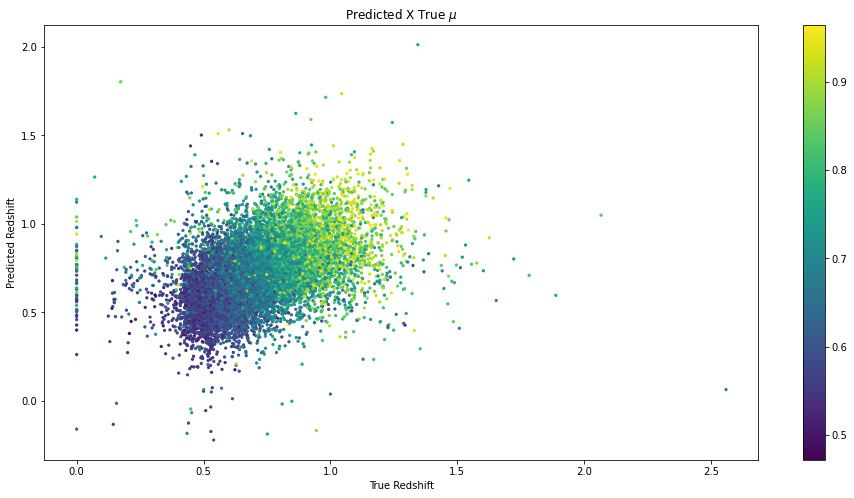

In [18]:
plt.figure(figsize=(16,8))
plt.title("Predicted X True $\mu$")
plt.scatter(y_test,test_predictions,s=5, c = np.squeeze(y_model.mean()),cmap = "viridis")
plt.xlabel("True Redshift")
plt.ylabel("Predicted Redshift")
plt.colorbar()

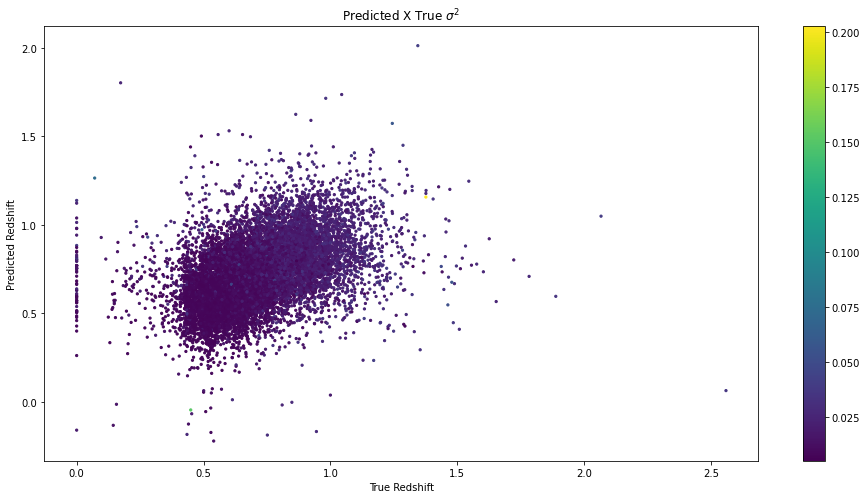

In [19]:
plt.figure(figsize=(16,8))
plt.title("Predicted X True $\sigma^2$")
plt.scatter(y_test,test_predictions,s=5, c = (np.squeeze(y_model.stddev()))**2)
plt.xlabel("True Redshift")
plt.ylabel("Predicted Redshift")
plt.colorbar()

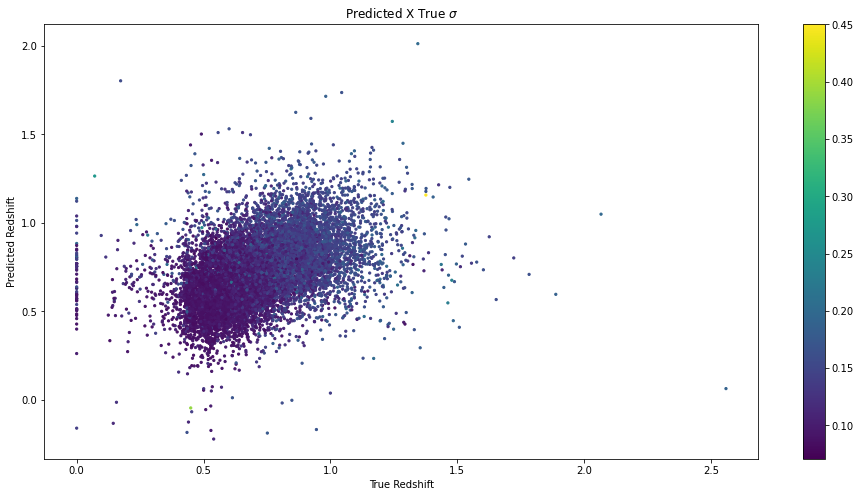

In [20]:
plt.figure(figsize=(16,8))
plt.title("Predicted X True $\sigma$")
plt.scatter(y_test,test_predictions,s=5, c = (np.squeeze(y_model.stddev())))
plt.xlabel("True Redshift")
plt.ylabel("Predicted Redshift")
plt.colorbar()

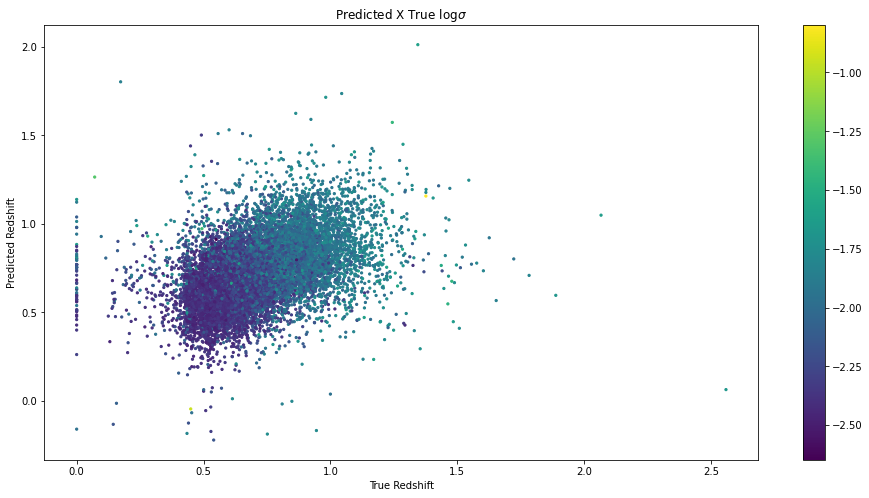

In [21]:
plt.figure(figsize=(16,8))
plt.title("Predicted X True $\log \sigma$")
plt.scatter(y_test,test_predictions,s=5, c = np.log(np.squeeze(y_model.stddev())))
plt.xlabel("True Redshift")
plt.ylabel("Predicted Redshift")
plt.colorbar()

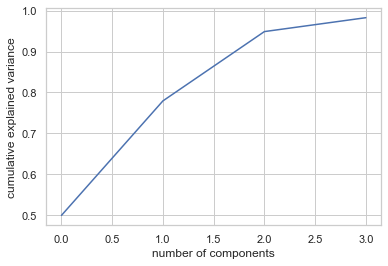

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.499451,0.499451
1,0.779274,0.279823
2,0.948677,0.169403
3,0.982633,0.033956


In [22]:
pca_test = PCA(n_components=4)
pca_test.fit(X)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
#plt.axvline(linewidth=4, color='r', linestyle = '--', x=2, ymin=0, ymax=1)
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(10))

In [23]:
pca = PCA(n_components=1)
X_new = pca.fit_transform(X_test)


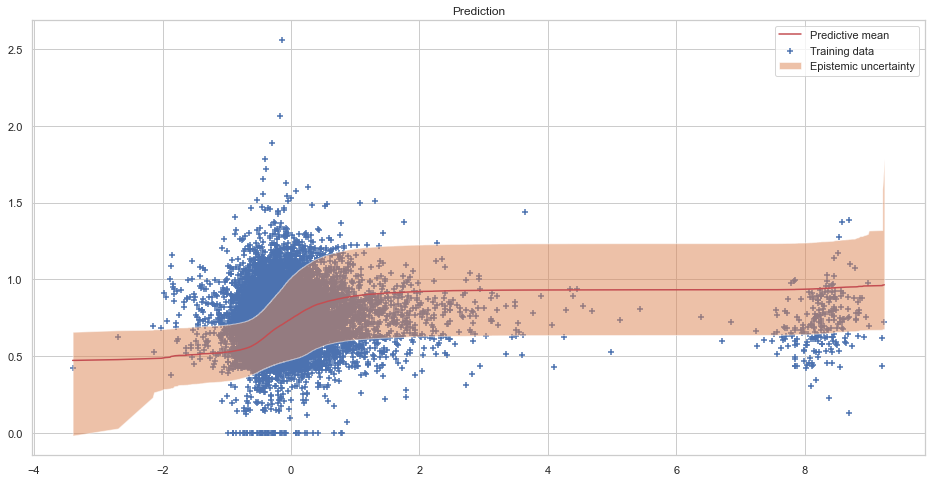

In [24]:
plt.figure(figsize=(16,8))
plt.plot(np.sort(X_new,0), np.sort(y_hat,0), 'r-', label='Predictive mean');
plt.scatter((X_new), (y_test), marker='+', label='Training data')
plt.fill_between(np.sort(X_new.ravel()), 
                np.sort(y_hat_minus_2sd.numpy().flatten()), 
                np.sort(y_hat_plus_2sd.numpy().flatten()), 
                 alpha=0.5, label='Epistemic uncertainty')
plt.title('Prediction')
plt.legend();

In [25]:
probs = []
for i in range(len(y_test)):
    probs.append(np.mean(y_model.prob(y_test[i])))

In [33]:
y_model.mean()

<tf.Tensor: shape=(14298, 1), dtype=float32, numpy=
array([[0.5720427 ],
       [0.8164731 ],
       [0.67386866],
       ...,
       [0.7938962 ],
       [0.7653443 ],
       [0.61721075]], dtype=float32)>

In [31]:
y_model.prob(0.65).numpy()

<tf.Tensor: shape=(14298,), dtype=float32, numpy=
array([3.089568 , 1.0116172, 3.942772 , ..., 1.6709208, 1.9085096,
       4.2690144], dtype=float32)>

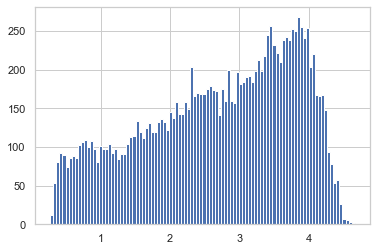

In [32]:
plt.hist(y_model.prob(0.65).numpy(),bins = 100);

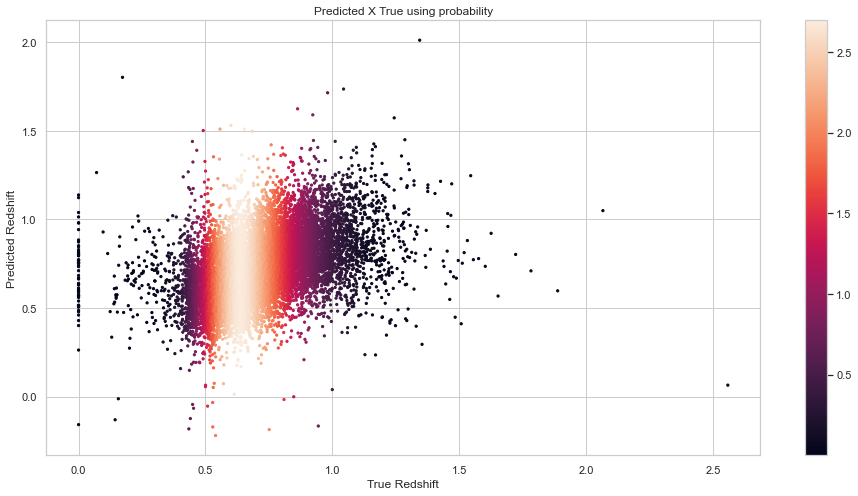

In [26]:
plt.figure(figsize=(16,8))
plt.title("Predicted X True using probability")
plt.scatter(y_test,test_predictions,s=5, c = (probs))
plt.xlabel("True Redshift")
plt.ylabel("Predicted Redshift")
plt.colorbar()

In [27]:
x = np.array(range(0,20+1))*5
x[0]=1

ind = x*len(probs)//100

In [28]:
x

array([  1,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
        65,  70,  75,  80,  85,  90,  95, 100])

In [29]:
probs = np.asarray(probs)

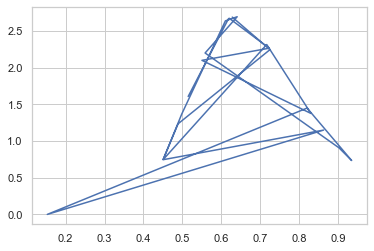

In [30]:
plt.plot(y_test[ind-1],probs[ind-1])

In [ ]:
y_model.prob()